In [64]:
import pandas as pd

In [65]:
import numpy as np

In [43]:
df = pd.read_csv('results/ml_1m_stratified_output.csv')

In [56]:
df = pd.read_csv('results/goodreads3.csv')

In [66]:
df = pd.read_csv('results/goodreadsonmovielens.csv')

In [74]:
df = pd.read_csv('results/movielensongoodreads.csv')

In [75]:
df.max(), df2.max(), len(df['user'].unique())

(user         6039.000000
 item         3705.000000
 actual          5.000000
 predicted       5.072272
 dtype: float64,
 user         6039.000000
 item         3705.000000
 actual          5.000000
 predicted       5.347891
 dtype: float64,
 6040)

In [76]:
from collections import defaultdict
# top_n = defaultdict(list)
# for i, (uid, iid, true_r, est, _) in df.iterrows():
#     top_n[uid].append((iid, est))
k = 20
user_est_true = defaultdict(list)
precisions = dict()
recalls = dict()
for i, (uid, _, true_r, est) in df.iterrows():
    user_est_true[uid].append((est, true_r))
threshold = 3.5
for uid, user_ratings in user_est_true.items():
    user_ratings.sort(key=lambda x: x[0], reverse=True)
    n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

    n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

    n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                          for (est, true_r) in user_ratings[:k])


    precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

    recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
print(np.array(list(precisions.values())).mean())
np.array(list(recalls.values())).mean()

0.6950436685487072


0.8095269287606246

In [78]:
from collections import defaultdict
# top_n = defaultdict(list)
# for i, (uid, iid, true_r, est, _) in df.iterrows():
#     top_n[uid].append((iid, est))
k = 20
user_est_true = defaultdict(list)
precisions = dict()
recalls = dict()
for i, (uid, _, true_r, est) in df.iterrows():
    user_est_true[uid].append((est, true_r))
threshold = 4.0
for uid, user_ratings in user_est_true.items():
    user_ratings.sort(key=lambda x: x[0], reverse=True)
    n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

    n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

    n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                          for (est, true_r) in user_ratings[:k])


    precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

    recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
print(np.array(list(precisions.values())).mean())
np.array(list(recalls.values())).mean()

0.6843117549078006


0.4728581165986266

In [55]:
from sklearn.metrics import ndcg_score
from scipy import sparse
    
k = 20

sparse_preds = sparse.coo_matrix( (df['predicted'].values, (df['user'].values.astype(int) , df['item'].values.astype(int) )) )
sparse_vals = sparse.coo_matrix( (df['actual'].values, (df['user'].values.astype(int) , df['item'].values.astype(int)  )) )

dense_preds = sparse_preds.toarray()
dense_vals = sparse_vals.toarray()

ndcg_score(y_true= dense_vals , y_score= dense_preds, k=k)

0.99000292283495

In [88]:
goodreadsrecall =[0.9266789071,0.6842655752,0.357084869,0.1169100196]
movielensrecall = [0.8875755718,0.7434914908,0.43254449,0.1151738985]
gooreadprecision = [0.9118082159,0.6488415356,0.4037248631,0.1319665228]
movielensprecision = [0.897140569,0.7293984856,0.7022147198,0.2232845117]

thresholds = [3.0, 3.5, 4.0, 4.5]

In [89]:
import matplotlib.pyplot as plt

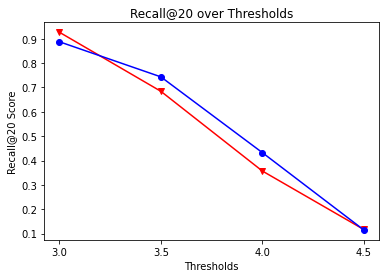

In [93]:
plt.plot(thresholds,goodreadsrecall, color='red', marker='v')
plt.plot(thresholds,movielensrecall, color='blue', marker='o')
# plt.plot(thresholds,gooreadprecision, color='red', marker='v')
# plt.plot(thresholds,movielensprecision, color='blue', marker='o')
plt.title('Recall@20 over Thresholds')
plt.xlabel('Thresholds')
plt.ylabel('Recall@20 Score')
plt.xticks(thresholds) 
plt.show()